# Bias correct indices for HydroTas 2020-2021 workplan:
- Skill assessment
  - rainfall, surface temp and surface wind over Australia region and Tasmania region
  - Assess skill as function of start month and ensemble size
- UNSEEN
  - Tasmanian rainfall and Melbourne surface temperature

In [1]:
import xarray as xr
import myfuncs as my

# Parameters

In [10]:
CLIM_PERIOD = slice('1990-01-01', '2019-12-31')
REGIONS = ['AUS', 'MEL', 'TAS']
PARAMS = [{'obsv_file': 'data/awap_precip_{region}.zarr',
           'fcst_file': 'data/f6_precip_{region}_raw.zarr',
           'obsv_scale': 1, 
           'fcst_scale': 86400,
           'period': slice('1990-01-01', '2019-12-31'),
           'method': 'multiplicative'},
          
          {'obsv_file': 'data/jra55_t_ref_{region}.zarr',
           'fcst_file': 'data/f6_t_ref_{region}_raw.zarr',
           'obsv_scale': 1, 
           'fcst_scale': 1,
           'period': slice('1990-01-01', '2019-12-31'),
           'method': 'additive'},
          
          {'obsv_file': 'data/jra55_V_ref_{region}.zarr',
           'fcst_file': 'data/f6_V_ref_{region}_raw.zarr',
           'obsv_scale': 1, 
           'fcst_scale': 1,
           'period': slice('1990-01-01', '2019-12-31'),
           'method': 'multiplicative'},
          
          {'obsv_file': 'data/awap_precip_{region}.zarr',
           'fcst_file': 'data/f5_precip_{region}_raw.zarr',
           'obsv_scale': 1, 
           'fcst_scale': 86400,
           'period': slice('1980-01-01', '2019-12-31'),
           'method': 'multiplicative'},
          
          {'obsv_file': 'data/jra55_t_ref_{region}.zarr',
           'fcst_file': 'data/f5_t_ref_{region}_raw.zarr',
           'obsv_scale': 1, 
           'fcst_scale': 1,
           'period': slice('1980-01-01', '2019-12-31'),
           'method': 'additive'},
          
          {'obsv_file': 'data/jra55_V_ref_{region}.zarr',
           'fcst_file': 'data/f5_V_ref_{region}_raw.zarr',
           'obsv_scale': 1, 
           'fcst_scale': 1,
           'period': slice('1980-01-01', '2019-12-31'),
           'method': 'multiplicative'}]

# Apply correction

In [11]:
def _effify(s):
    "Evaluate as f string. This is dangerous with untrusted input"
    return eval(f'f"""{s}"""')

for params in PARAMS:
    for region in REGIONS:
        obsv = my.open_zarr(_effify(params['obsv_file'])).compute() * params['obsv_scale']
        fcst = my.open_zarr(_effify(params['fcst_file'])).compute() * params['fcst_scale']
        
        bias = my.get_bias(fcst, obsv, params['period'], method=params['method'])
        fcst_bc = my.remove_bias(fcst, bias)
        
        my.to_zarr(bias, _effify(params['fcst_file']).replace('raw','bias'))
        my.to_zarr(fcst_bc, _effify(params['fcst_file']).replace('_raw',''))

# Check the correction

In [12]:
fcst = my.open_zarr('data/f5_t_ref_AUS.zarr.zip')
obsv = my.open_zarr('data/jra55_t_ref_AUS.zarr.zip')

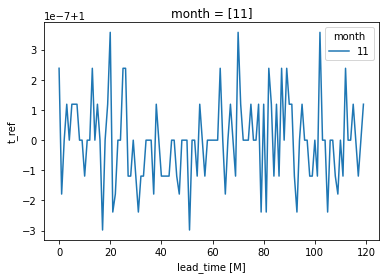

In [13]:
period = eval(fcst.attrs['bias_correction_period'])
my.get_bias(fcst['t_ref'], obsv['t_ref'], period, 
            method='multiplicative').plot.line(x='lead_time')

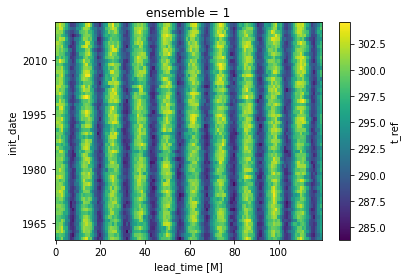

In [14]:
fcst['t_ref'].isel(ensemble=0).plot()

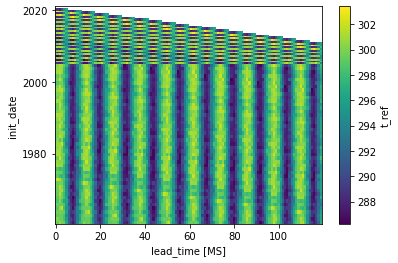

In [15]:
obsv['t_ref'].plot()